<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day23_Smart_Recipe_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept**

Creative generation with constraints - this project focuses on using AI to generate creative content (recipes) while working within specific limitations (available ingredients).

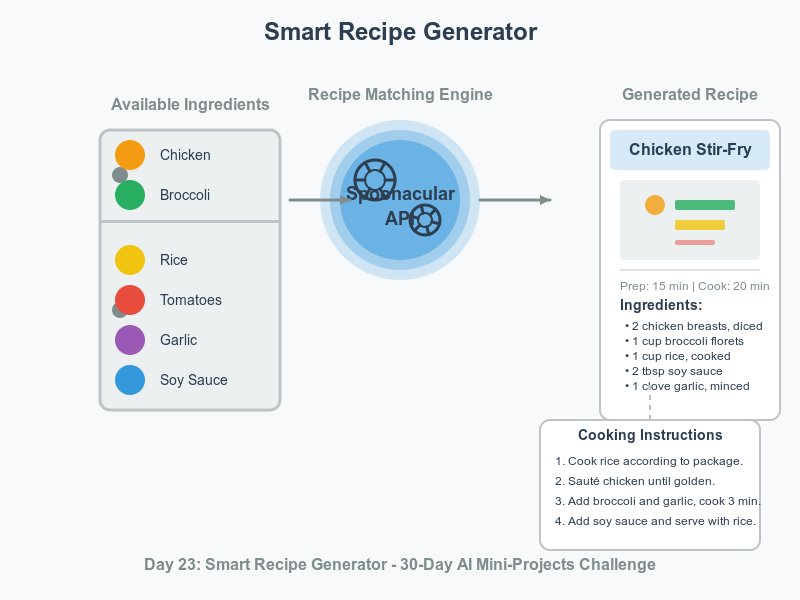



**Set up libraries**





In [12]:
# Install required libraries
!pip install requests pandas numpy

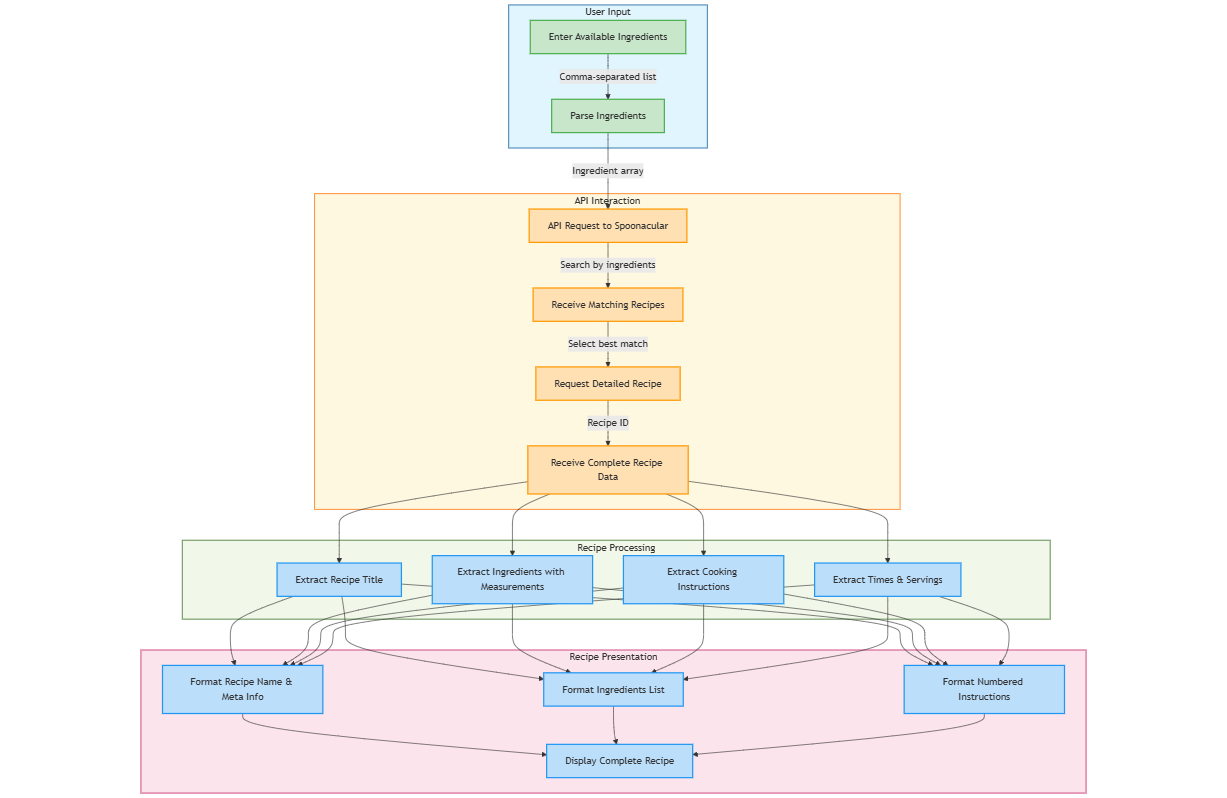

**Import Libraries**

In [13]:
import requests
import json
import pandas as pd
import numpy as np
import random

# You'll need to get a free API key from Spoonacular
API_KEY = "9118eb214ca644a9a68e324e35678164"  # Replace with your actual API key
BASE_URL = "https://api.spoonacular.com"

**Implementing the Core Recipe Search Function**

In [14]:
def find_recipes_by_ingredients(ingredients, number=5):
    """Find recipes that use the specified ingredients."""
    endpoint = "/recipes/findByIngredients"
    url = f"{BASE_URL}{endpoint}"

    # Convert list of ingredients to comma-separated string
    ingredients_str = ",".join(ingredients)

    params = {
        "apiKey": API_KEY,
        "ingredients": ingredients_str,
        "number": number,
        "ranking": 2,  # 2 = minimize missing ingredients
        "ignorePantry": True  # ignore typical pantry items
    }

    response = requests.get(url, params=params)
    return response.json()

**Building the Detailed Recipe Information Function**

In [15]:
def get_recipe_information(recipe_id):
    """Get detailed information about a specific recipe."""
    endpoint = f"/recipes/{recipe_id}/information"
    url = f"{BASE_URL}{endpoint}"

    params = {
        "apiKey": API_KEY,
        "includeNutrition": False
    }

    response = requests.get(url, params=params)
    return response.json()

**Creating the Recipe Generation Function**

In [16]:
def generate_recipe_from_ingredients(available_ingredients, number=5):
    """Generate a recipe based on available ingredients."""
    # Find recipes matching our ingredients
    matching_recipes = find_recipes_by_ingredients(available_ingredients, number)

    if not matching_recipes:
        return {"error": "No matching recipes found"}

    # Get detailed information for the best match
    best_match = matching_recipes[0]
    recipe_id = best_match['id']
    recipe_details = get_recipe_information(recipe_id)

    # Format the recipe
    recipe = {
        "name": recipe_details.get('title', 'Custom Recipe'),
        "ingredients": [],
        "steps": [],
        "prep_time": recipe_details.get('preparationMinutes', 15),
        "cook_time": recipe_details.get('cookingMinutes', 30),
        "servings": recipe_details.get('servings', 4)
    }

    # Extract ingredients
    if 'extendedIngredients' in recipe_details:
        for ingredient in recipe_details['extendedIngredients']:
            recipe['ingredients'].append(ingredient.get('original', ''))

    # Extract steps
    if 'analyzedInstructions' in recipe_details and recipe_details['analyzedInstructions']:
        for step in recipe_details['analyzedInstructions'][0]['steps']:
            recipe['steps'].append(step.get('step', ''))

    return recipe

**Building the User Interface**

In [17]:
def recipe_generator_interface():
    """Interactive interface for the recipe generator"""
    print("\n===== SMART RECIPE GENERATOR =====\n")

    # Get available ingredients from user
    print("Enter the ingredients you have (separate with commas):")
    user_input = input()
    available_ingredients = [ing.strip() for ing in user_input.split(',')]

    print(f"\nYou entered {len(available_ingredients)} ingredients: {', '.join(available_ingredients)}")
    print("\nGenerating recipe...")

    # Generate recipe
    recipe = generate_recipe_from_ingredients(available_ingredients)

    # Display the recipe
    if "error" in recipe:
        print(f"\n⚠️ {recipe['error']}")
        print("Try adding more common ingredients or checking spelling.")
    else:
        print(f"\n🍽️ {recipe['name'].upper()} 🍽️")
        print(f"Prep: {recipe['prep_time']} minutes | Cook: {recipe['cook_time']} minutes | Serves: {recipe['servings']}")

        print("\n📋 INGREDIENTS:")
        for i, ingredient in enumerate(recipe['ingredients'], 1):
            print(f"  {i}. {ingredient}")

        print("\n📝 INSTRUCTIONS:")
        for i, step in enumerate(recipe['steps'], 1):
            print(f"  {i}. {step}")

        print("\nBon Appétit! 👨‍🍳✨")

    print("\nWould you like to generate another recipe? (yes/no)")
    if input().lower().startswith('y'):
        recipe_generator_interface()

**Testing with Sample Ingredients**

In [18]:
# Test with sample ingredient sets
test_ingredients = [
    ["chicken", "rice", "broccoli", "soy sauce"],
    ["pasta", "tomatoes", "garlic", "basil", "olive oil"],
    ["potatoes", "cheese", "bacon", "cream"]
]

print("===== TESTING RECIPE GENERATOR =====\n")
for i, ingredients in enumerate(test_ingredients, 1):
    print(f"Test {i}: {', '.join(ingredients)}")
    recipe = generate_recipe_from_ingredients(ingredients)

    if "error" in recipe:
        print(f"Result: {recipe['error']}\n")
    else:
        print(f"Result: Generated '{recipe['name']}' with {len(recipe['ingredients'])} ingredients and {len(recipe['steps'])} steps\n")

===== TESTING RECIPE GENERATOR =====

Test 1: chicken, rice, broccoli, soy sauce
Result: Generated 'Kappa Maki' with 3 ingredients and 5 steps

Test 2: pasta, tomatoes, garlic, basil, olive oil
Result: Generated 'Heirloom Tomato Basil and Olive Oil Wine Sauce over Pasta' with 7 ingredients and 11 steps

Test 3: potatoes, cheese, bacon, cream
Result: Generated 'Parmesan Mashed Potatoes' with 5 ingredients and 4 steps



**Running the Interactive Interface**

In [23]:
# Run the interactive recipe generator
recipe_generator_interface()


===== SMART RECIPE GENERATOR =====

Enter the ingredients you have (separate with commas):
chicken

You entered 1 ingredients: chicken

Generating recipe...

🍽️ ZUCCHINI CHICKEN OMELETTE 🍽️
Prep: None minutes | Cook: None minutes | Serves: 2

📋 INGREDIENTS:
  1. 3 Eggs
  2. 1 tablespoon Water
  3. 150 grams Zucchini, grated
  4. Salt and pepper to taste
  5. 1 tablespoon Oil
  6. 80 grams Milanese chicken left over, diced

📝 INSTRUCTIONS:
  1. Beat eggs and water in a bowl.
  2. Mix in grated zucchini and season with salt and pepper.
  3. Heat the oil in a small, non-stick skillet. When hot, add half the egg mixture and cook for 1 minute until the egg begins to set. Scatter evenly with half diced chicken.
  4. Cook for a further 1-2 minutes, until the egg is golden underneath, and just set on top. Slide out onto a serving plate, folding it over as you go. Repeat.
  5. Serve the omelette with your favourite salad.

Bon Appétit! 👨‍🍳✨

Would you like to generate another recipe? (yes/no)
